# Eurostat notebook

This is a trial notebook which is introducing the eurostat python package, source: https://pypi.org/project/eurostat/.
At first import packages as always.

In [1]:
import eurostat

The first step is to read the Eurostat table of contents into a dataframe by [**get_toc_df()**](https://pypi.org/project/eurostat/) function. It retrieves the titles, codes and timestamps of all Eurostat datasets.

## Browsing through Eurostat

In [2]:
toc_df = eurostat.get_toc_df()
toc_df

,title,code,type,last update of data,last table structure change,data start,data end
0,Gross weight of goods transported to/from main...,MAR_GO_AM_RO,dataset,2010-02-26T23:00:00+0100,2023-07-27T23:00:00+0200,2004,2022
1,Gross weight of goods transported to/from main...,MAR_GO_AM_SE,dataset,2010-02-26T23:00:00+0100,2023-07-27T23:00:00+0200,1997,2022
2,Gross weight of goods transported to/from main...,MAR_GO_AM_SI,dataset,2023-08-24T23:00:00+0200,2023-08-24T23:00:00+0200,2001,2022
3,Gross weight of goods transported to/from main...,MAR_GO_AM_TR,dataset,2011-04-11T23:00:00+0200,2023-07-27T23:00:00+0200,2008,2022
4,Gross weight of goods transported to/from main...,MAR_GO_AM_UK,dataset,2010-04-22T11:00:00+0200,2023-11-22T11:00:00+0100,2000,2019
...,...,...,...,...,...,...,...
7644,Percentage of letters delivered on-time (USP u...,POST_CUBE1_X$POST_QOS_1,dataset,2024-03-14T12:09:14Z,2024-03-14T12:09:14Z,None,None
7645,Postal services,POST_CUBE1_X,dataset,2024-03-14T12:05:33Z,2024-03-14T12:05:33Z,2012,2022
7646,Number of enterprises providing postal services,POST_CUBE1_X$NUM701,dataset,2024-03-14T12:09:14Z,2024-03-14T12:09:14Z,None,None
7647,Access points (USP under direct or indirect d...,POST_CUBE1_X$POST_ACC_1,dataset,2024-03-14T12:09:14Z,2024-03-14T12:09:14Z,None,None


You can filter the datasets by *keyword*. Function [**subset_toc_df()**](https://pypi.org/project/eurostat/) extracts the datasets where the title contains *keyword*. Let's pick a keyword, for example ```'science'```.

In [3]:
sc_datasets = eurostat.subset_toc_df(toc_df, 'science')
sc_datasets

,title,code,type,last update of data,last table structure change,data start,data end
834,Human resources in science and technology (HRS...,TGS00038,dataset,2024-03-15T23:00:00+0100,2024-03-15T23:00:00+0100,2011,2022
1410,"Low achieving 15-year-olds in reading, mathema...",EDUC_OUTC_PISA,dataset,2023-12-14T11:00:00+0100,2024-01-03T23:00:00+0100,2000,2022
1678,"Graduates in tertiary education, in science, m...",EDUC_UOE_GRAD04,dataset,2024-01-26T11:00:00+0100,2024-01-03T23:00:00+0100,2012,2021
1688,"Graduates at doctoral level, in science, math....",EDUC_UOE_GRAD07,dataset,2023-12-12T11:00:00+0100,2024-01-03T23:00:00+0100,2013,2021
3572,Human resources in science and technology (HRST),TSC00025,dataset,2024-03-14T23:00:00+0100,2024-03-14T23:00:00+0100,2011,2022
7208,"Low achieving 15-year-olds in reading, mathema...",SDG_04_40,dataset,2024-01-03T23:00:00+0100,2024-01-03T23:00:00+0100,2000,2022


Unfortunately, titles are a bit longer so they are not fully visible. Select only necessary attributes ```'title'```, ```'code'```, ```'data start'``` and ```'data end'``` by [**DataFrame.loc**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) method. Then set ```'title'``` as the DataFrame's index by [**set_index()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html) function so you can access the values by dataset's title and you can see the whole title.

In [4]:
sc_datasets = sc_datasets.loc[:, ('title', 'code', 'data start', 'data end')]
sc_datasets.set_index('title', inplace=True)
sc_datasets

,code,data start,data end
title,,,
Human resources in science and technology (HRST) by NUTS 2 regions,TGS00038,2011,2022
"Low achieving 15-year-olds in reading, mathematics or science by sex",EDUC_OUTC_PISA,2000,2022
"Graduates in tertiary education, in science, math., computing, engineering, manufacturing, construction, by sex - per 1000 of population aged 20-29",EDUC_UOE_GRAD04,2012,2021
"Graduates at doctoral level, in science, math., computing, engineering, manufacturing, construction, by sex - per 1000 of population aged 25-34",EDUC_UOE_GRAD07,2013,2021
Human resources in science and technology (HRST),TSC00025,2011,2022
"Low achieving 15-year-olds in reading, mathematics or science",SDG_04_40,2000,2022


Let's choose the [**Human resources in science and technology (HRST) by NUTS 2 regions**](https://ec.europa.eu/eurostat/databrowser/view/tgs00038/default/table?lang=en) as the working dataset for this notebook.

Use [**get_data_df()**](https://pypi.org/project/eurostat/) function to read the dataset, specified by its code, into a dataframe.

In [5]:
code = sc_datasets.loc['Human resources in science and technology (HRST) by NUTS 2 regions', 'code']
data = eurostat.get_data_df(code)
data

,freq,category,unit,geo\TIME_PERIOD,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,HRST,PC_ACT,AT11,35.8,34.9,37.4,43.5,45.3,45.1,47.2,46.4,48.6,51.4,49.9,50.5
1,A,HRST,PC_ACT,AT12,37.5,37.9,39.2,46.1,47.3,47.1,49.2,49.5,49.1,51.0,52.0,51.2
2,A,HRST,PC_ACT,AT13,46.5,47.4,50.5,56.6,56.1,55.9,56.9,55.5,56.6,57.2,57.9,60.1
3,A,HRST,PC_ACT,AT21,35.9,36.5,37.7,44.2,43.9,45.5,45.3,47.7,47.0,49.1,50.0,49.1
4,A,HRST,PC_ACT,AT22,35.4,36.8,36.2,41.5,43.1,43.7,44.4,45.3,46.0,46.9,46.7,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,A,HRST,PC_ACT,UKM6,45.2,47.6,51.0,48.5,49.0,50.2,52.9,49.8,53.0,NaN,NaN,NaN
337,A,HRST,PC_ACT,UKM7,NaN,NaN,56.5,56.3,57.5,59.3,60.4,59.2,61.4,NaN,NaN,NaN
338,A,HRST,PC_ACT,UKM8,NaN,NaN,52.0,53.0,55.7,58.3,57.0,56.9,60.4,NaN,NaN,NaN
339,A,HRST,PC_ACT,UKM9,NaN,NaN,47.7,49.4,48.9,52.4,52.5,52.1,54.5,NaN,NaN,NaN


Get the column names by [**get_pars()**](https://pypi.org/project/eurostat/) function and save them in a list ```columns```.

In [7]:
columns = eurostat.get_pars(code)
columns

['freq', 'category', 'unit', 'geo']

Maybe you know what these abbreviations stand for, but it's not 100% clear. Get the full names and meanings of these columns using [**get_dic()**](https://pypi.org/project/eurostat/) function.

In [8]:
columns_meanings = eurostat.get_dic(code)
columns_meanings

[('freq',
  'Time frequency',
  'This code list contains the periodicity that refers to the frequency.'),
 ('category', 'Category', None),
 ('unit', 'Unit of measure', None),
 ('geo',
  'Geopolitical entity (reporting)',
  'This code list defines the reporting geopolitical entities.')]

Now get the column values and their meanings by using the same **get_dic()** function. You have to provide more parameters in order to get that, so let's break it down:
- ```code```: variable ```code``` that specifies the dataset
- ```par```: for which column you want to get the values and their meanings
- ```full```: boolean parameter that determins whether you want values only in this dataset (```False```) or the list of all possible values (```True```) 
- ```frmt```: format in which you want to get it, there are 3 options = dictionary (```'dict'```), dataframe (```'df'```), list (```'list'```)

In [9]:
column_dict = []
for column in columns:
    column_dict.append(eurostat.get_dic(code, par=column, full=False, frmt='dict'))
column_dict

[{'A': 'Annual'},
 {'HRST': 'Persons with tertiary education (ISCED) and/or employed in science and technology'},
 {'PC_ACT': 'Percentage of population in the labour force'},
 {'EA20': 'Euro area – 20 countries (from 2023)',
  'BE10': 'Région de Bruxelles-Capitale/Brussels Hoofdstedelijk Gewest',
  'BE21': 'Prov. Antwerpen',
  'BE22': 'Prov. Limburg (BE)',
  'BE23': 'Prov. Oost-Vlaanderen',
  'BE24': 'Prov. Vlaams-Brabant',
  'BE25': 'Prov. West-Vlaanderen',
  'BE31': 'Prov. Brabant wallon',
  'BE32': 'Prov. Hainaut',
  'BE33': 'Prov. Liège',
  'BE34': 'Prov. Luxembourg (BE)',
  'BE35': 'Prov. Namur',
  'BG31': 'Severozapaden',
  'BG32': 'Severen tsentralen',
  'BG33': 'Severoiztochen',
  'BG34': 'Yugoiztochen',
  'BG41': 'Yugozapaden',
  'BG42': 'Yuzhen tsentralen',
  'CZ01': 'Praha',
  'CZ02': 'Střední Čechy',
  'CZ03': 'Jihozápad',
  'CZ04': 'Severozápad',
  'CZ05': 'Severovýchod',
  'CZ06': 'Jihovýchod',
  'CZ07': 'Střední Morava',
  'CZ08': 'Moravskoslezsko',
  'DK01': 'Hovedstade

Let's do a little exercise: print the codes and names of all NUTS2 in Czech Republic (NUTS2 code start with ```'CZ'```).

In [10]:
for code, full_name in column_dict[3].items():
    if 'CZ' in code:
        print(f"{code}: {full_name}")

CZ01: Praha
CZ02: Střední Čechy
CZ03: Jihozápad
CZ04: Severozápad
CZ05: Severovýchod
CZ06: Jihovýchod
CZ07: Střední Morava
CZ08: Moravskoslezsko


## Get NUTS2 into GeoDataFrame

Import package [**requests**](https://pypi.org/project/requests/) for sending http requests to download data, built-in module [**os**](https://www.w3schools.com/python/module_os.asp) for managing files and directories and [**geopandas**](https://geopandas.org/en/stable/) to work with spatial data in the GeoDataFrame format.

In [6]:
import requests
import os
import geopandas

Set parameters and variables for downloading NUTS2 regions geojson file from the EU database of geographical information [GISCO](https://ec.europa.eu/eurostat/web/gisco).

In [7]:
# URL of the NUTS2 geojson to download
url = "https://gisco-services.ec.europa.eu/distribution/v2/nuts/geojson/NUTS_RG_01M_2021_4326_LEVL_2.geojson"

# NUTS2 regions will be downloaded in 1:1 000 000 scale resolution, valid for the year 2021 and in EPSG:4326 crs (WGS 84)
file_name = "NUTS_RG_01M_2021_4326_LEVL_2.geojson"

# set your own path where you want to save the geojson, it's recommended to save it in the same directory as this notebook is
file_path = os.path.join("D:/ArcGIS_Notebooks_thesis/eurostat/", file_name)

This next cell will download the NUTS2 regions geojson. At first it'll check if it hasn't already been downloaded by [**os.path.exists**](https://www.geeksforgeeks.org/python-os-path-exists-method/) function. If not, then a GET request is sent to the ```url``` where the geojson is stored and if this request is successful (status code *200*), then it's downloaded and saved where you set the ```file_path```.

In [8]:
if os.path.exists(file_path):
    print("NUTS2 geojson file has already been downloaded.")
else:
    # object response contains the result of the GET request to the specified URL
    response = requests.get(url)

    if response.status_code == 200:
        # write the content to a file
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"File '{file_name}' downloaded successfully!")
    else:
        print("Failed to download the file.")

NUTS2 geojson file has already been downloaded.


Read now the downloaded geojson into a GeoDataFrame ```gdf_from_geojson``` using [**read_file()**](https://geopandas.org/en/stable/docs/reference/api/geopandas.read_file.html#geopandas.read_file) function and print its first 5 rows (GeoDataFrame.head()).

In [9]:
gdf_from_geojson = geopandas.read_file(file_path)
gdf_from_geojson.head()

,id,NUTS_ID,LEVL_CODE,CNTR_CODE,NAME_LATN,NUTS_NAME,MOUNT_TYPE,URBN_TYPE,COAST_TYPE,FID,geometry
0,DE12,DE12,2,DE,Karlsruhe,Karlsruhe,0.0,0,0,DE12,"MULTIPOLYGON (((9.60382 49.42658, 9.57113 49.4..."
1,CH05,CH05,2,CH,Ostschweiz,Ostschweiz,0.0,0,0,CH05,"MULTIPOLYGON (((8.61383 47.80108, 8.62155 47.7..."
2,CZ02,CZ02,2,CZ,Střední Čechy,Střední Čechy,0.0,0,0,CZ02,"MULTIPOLYGON (((15.14677 50.52294, 15.14161 50..."
3,CH01,CH01,2,CH,Région lémanique,Région lémanique,0.0,0,0,CH01,"MULTIPOLYGON (((6.78005 46.85264, 6.74231 46.8..."
4,BE24,BE24,2,BE,Prov. Vlaams-Brabant,Prov. Vlaams-Brabant,0.0,0,0,BE24,"POLYGON ((5.10348 50.70906, 5.09468 50.70367, ..."


You can see that there are 3 columns which possibly contain the same values: ```id```, ```NUTS_ID``` and ```FID```. Verify whether they really contain the same values by creating lists from these columns and comparing them. If they are identical, you can carry on with only one of them.

In [10]:
id_list = gdf_from_geojson['id'].tolist()     #https://datatofish.com/convert-pandas-dataframe-to-list/
nuts_id_list = gdf_from_geojson['NUTS_ID'].tolist()
fid_list = gdf_from_geojson['FID'].tolist()

if id_list == nuts_id_list == fid_list:
    print("IDs in all three columns 'id', 'NUTS_ID' and 'FID' are identical")
else:
    print("IDs are not identical")

IDs in all three columns 'id', 'NUTS_ID' and 'FID' are identical


Do the same for columns ```NAME_LATN``` and ```NUTS_NAME```, because they also look like they contain the same values.

In [11]:
name_latn_list = gdf_from_geojson['NAME_LATN'].tolist()
nuts_name_list = gdf_from_geojson['NUTS_NAME'].tolist()

if name_latn_list == nuts_name_list:
    print("names in the columns 'NAME_LATN' and 'NUTS_NAME' are identical")
else:
    print("names in the columns 'NAME_LATN' and 'NUTS_NAME' are not identical")

names in the columns 'NAME_LATN' and 'NUTS_NAME' are not identical


After these columns control you can save the GeoDataFrame only with important columns. You can drop the columns ```id```, ```LEVL_CODE```, ```MOUNT_TYPE```, ```URBN_TYPE```, ```COAST_TYPE``` and ```FID```.

In [12]:
gdf_from_geojson = gdf_from_geojson.loc[:, ('NUTS_ID', 'CNTR_CODE', 'NAME_LATN', 'NUTS_NAME', 'geometry')]
gdf_from_geojson

,NUTS_ID,CNTR_CODE,NAME_LATN,NUTS_NAME,geometry
0,DE12,DE,Karlsruhe,Karlsruhe,"MULTIPOLYGON (((9.60382 49.42658, 9.57113 49.4..."
1,CH05,CH,Ostschweiz,Ostschweiz,"MULTIPOLYGON (((8.61383 47.80108, 8.62155 47.7..."
2,CZ02,CZ,Střední Čechy,Střední Čechy,"MULTIPOLYGON (((15.14677 50.52294, 15.14161 50..."
3,CH01,CH,Région lémanique,Région lémanique,"MULTIPOLYGON (((6.78005 46.85264, 6.74231 46.8..."
4,BE24,BE,Prov. Vlaams-Brabant,Prov. Vlaams-Brabant,"POLYGON ((5.10348 50.70906, 5.09468 50.70367, ..."
...,...,...,...,...,...
329,NO0A,NO,Vestlandet,Vestlandet,"MULTIPOLYGON (((9.06206 62.37261, 9.01855 62.3..."
330,TR51,TR,Ankara,Ankara,"POLYGON ((33.46440 38.63659, 33.45947 38.64448..."
331,TR52,TR,"Konya, Karaman","Konya, Karaman","POLYGON ((33.46440 38.63659, 33.36248 38.56250..."
332,HR05,HR,Grad Zagreb,Grad Zagreb,"POLYGON ((16.15481 45.96877, 16.15674 45.96095..."


At this point you know what the ```gdf_from_geojson``` contain but you don't know how it looks like on the map. Use [**plot()**](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot) function to plot it.

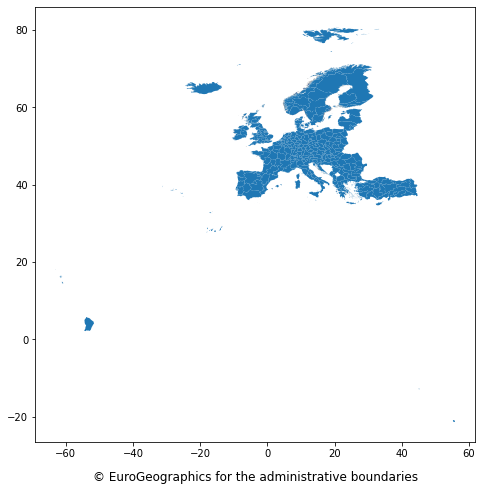

In [13]:
ax = gdf_from_geojson.plot(figsize=(8, 8))
_ = ax.set_xlabel('© EuroGeographics for the administrative boundaries', fontsize = 12, labelpad = 12.0)

As you can see from the plot above, there NUTS2 regions cover also overseas territories that are not necessary for this use case and often doesn't contain any data. You can drop them by slicing the ```gdf_from_geojson``` by coordinates. GeoDataFrame "provides coordinate based [**indexing**](https://geopandas.org/en/stable/docs/user_guide/indexing.html) with the ```cx``` indexer, which slices using a bounding box". 

So now select only those regions which are located between 34° and 70° north latitude and east of 15° west longitude. Save them into a new GeoDataFrame ```nuts2_gdf```, print the number of regions and plot them.

325


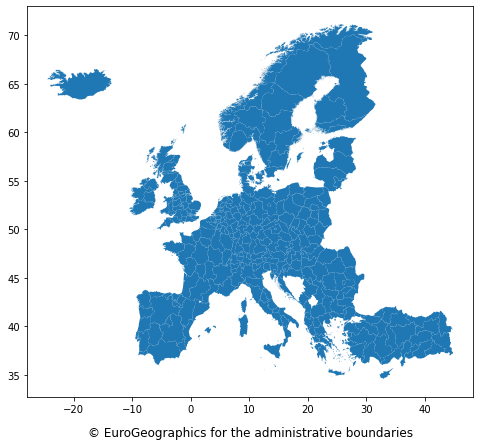

In [14]:
nuts2_gdf = gdf_from_geojson.cx[-15:, 34:70]
print(len(nuts2_gdf))
ax = nuts2_gdf.plot(figsize=(8, 8))
_ = ax.set_xlabel('© EuroGeographics for the administrative boundaries', fontsize = 12, labelpad = 12.0)

The ```nuts2_gdf``` is currently saved in [EPSG:4326](https://epsg.io/4326) coordinate reference system (crs) WGS 84. However, the crs with the best projection for the whole Europe is [EPSG:3035](https://epsg.io/3035) crs ETRS89-extended/LAEA Europe. It distorts the angles but preserves the areas. Project the GeoDataFrame into it using [**to_crs()**](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.to_crs.html) function and plot it to see the difference between EPSG:4326 and EPSG:3035.

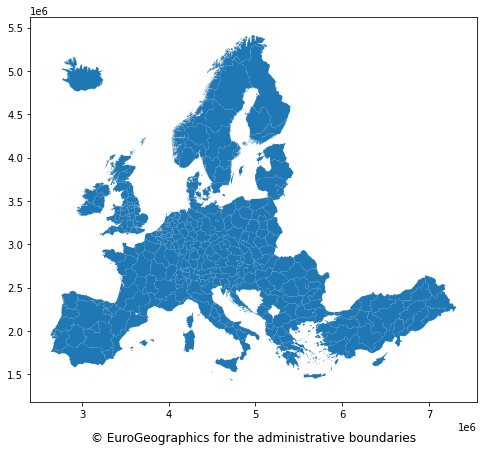

In [15]:
nuts2_gdf = nuts2_gdf.to_crs("EPSG:3035")
ax = nuts2_gdf.plot(figsize=(8, 8))
_ = ax.set_xlabel('© EuroGeographics for the administrative boundaries', fontsize = 12, labelpad = 12.0)

## Join the dataset to the NUTS2 GeoDataFrame

At this point you have 2 separate NUTS2 data structures: 
- ```data``` DataFrame that contains Eurostat dataset **"Human resources in science and technology (HRST) by NUTS 2 regions"** 
- ```nuts2_gdf``` GeoDataFrame that contains NUTS2 regions with their geometry

Join ```data``` to ```nuts2_gdf``` in order to make maps of HRST in European regions. You have to find a common column in both tables (primary and foreign key) before joining them together. It is the ```NUTS_ID``` column in ```nuts2_gdf``` and the ```geo``` column in ```data```. [**Rename**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) the column ```'geo\TIME_PERIOD'``` to ```'NUTS_ID'``` in ```data```.

In [16]:
data.rename(columns = {'geo\TIME_PERIOD':'NUTS_ID'}, inplace = True)
data.head()

,freq,category,unit,NUTS_ID,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,HRST,PC_ACT,AT11,35.8,34.9,37.4,43.5,45.3,45.1,47.2,46.4,48.6,51.4,49.9,50.5
1,A,HRST,PC_ACT,AT12,37.5,37.9,39.2,46.1,47.3,47.1,49.2,49.5,49.1,51.0,52.0,51.2
2,A,HRST,PC_ACT,AT13,46.5,47.4,50.5,56.6,56.1,55.9,56.9,55.5,56.6,57.2,57.9,60.1
3,A,HRST,PC_ACT,AT21,35.9,36.5,37.7,44.2,43.9,45.5,45.3,47.7,47.0,49.1,50.0,49.1
4,A,HRST,PC_ACT,AT22,35.4,36.8,36.2,41.5,43.1,43.7,44.4,45.3,46.0,46.9,46.7,49.0


Now you can join ```data``` to ```nuts2_gdf``` using [**merge()**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) function. Save it in a new GeoDataFrame ```nuts2_gdf_hrst```.

In [17]:
nuts2_gdf_hrst = nuts2_gdf.merge(data, on='NUTS_ID')
nuts2_gdf_hrst.head()

,NUTS_ID,CNTR_CODE,NAME_LATN,NUTS_NAME,geometry,freq,category,unit,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,DE12,DE,Karlsruhe,Karlsruhe,"MULTIPOLYGON (((4292253.705 2923819.973, 42898...",A,HRST,PC_ACT,45.7,46.8,47.1,47.3,48.3,48.5,48.7,48.4,50.5,50.7,51.4,52.2
1,CH05,CH,Ostschweiz,Ostschweiz,"MULTIPOLYGON (((4217105.198 2744025.879, 42176...",A,HRST,PC_ACT,42.0,42.2,44.2,45.3,45.9,47.6,48.3,49.7,51.6,52.0,51.4,50.4
2,CZ02,CZ,Střední Čechy,Střední Čechy,"MULTIPOLYGON (((4685657.738 3058491.488, 46853...",A,HRST,PC_ACT,34.4,36.7,36.6,37.3,37.1,36.6,38.0,40.0,39.1,39.2,40.0,39.6
3,CH01,CH,Région lémanique,Région lémanique,"MULTIPOLYGON (((4075295.021 2643018.666, 40722...",A,HRST,PC_ACT,49.5,50.2,50.3,51.0,51.2,52.8,54.7,55.2,55.9,55.7,54.8,54.4
4,BE24,BE,Prov. Vlaams-Brabant,Prov. Vlaams-Brabant,"POLYGON ((3975414.370 3077940.643, 3974754.391...",A,HRST,PC_ACT,55.2,56.1,54.8,56.6,56.3,58.3,61.9,59.1,60.6,63.1,65.1,62.7


Print the number of rows in this newly merged GeoDataFrame ```nuts2_gdf_hrst```.

In [18]:
print(len(nuts2_gdf_hrst))
print(len(nuts2_gdf))

321
325


Why is there 4 less rows compared to the original GeoDataFrame ```nuts2_gdf``` (321 vs 325)? It's because the eurostat dataset HRST didn't have the data for all NUTS2. Get the ```'NUTS_ID'``` of the 4 NUTS2 regions that are missing in the eurostat dataset and save them in the ```difference``` list.

In [19]:
# get nuts2 ids from both geodataframes and save them in lists
nuts2_gdf_id_list = nuts2_gdf['NUTS_ID'].tolist()
nuts2_gdf_hrst_id_list = nuts2_gdf_hrst['NUTS_ID'].tolist()

# define new list difference
difference = []
# loop through the ids in the nuts2_gdf, where there are more nuts2 regions
for id in nuts2_gdf_id_list:
    # if id is not in the nuts2_gdf_hrst id list, add it to the difference list
    if id not in nuts2_gdf_hrst_id_list:
        difference.append(id)

# print the ids of 4 missing nuts2 regions
difference

['AL01', 'AL02', 'AL03', 'LI00']

Set the ```NUTS_ID``` column as the index for ```nuts2_gdf``` and print the 4 missing NUTS2 regions in a table and on a map.

In [20]:
# set_index() => https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html
nuts2_gdf.set_index('NUTS_ID', inplace=True)
nuts2_gdf.loc[difference, :]

,CNTR_CODE,NAME_LATN,NUTS_NAME,geometry
NUTS_ID,,,,
AL01,AL,Veri,Veri,"POLYGON ((5129579.218 2204098.703, 5129899.812..."
AL02,AL,Qender,Qender,"POLYGON ((5178239.016 2085653.856, 5180303.196..."
AL03,AL,Jug,Jug,"MULTIPOLYGON (((5211962.703 2061668.486, 52149..."
LI00,LI,Liechtenstein,Liechtenstein,"POLYGON ((4292201.681 2670971.921, 4292532.342..."


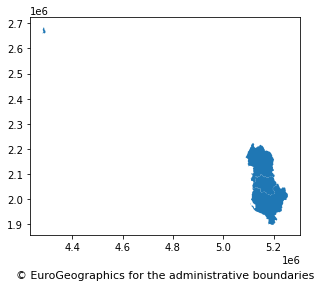

In [21]:
ax = nuts2_gdf.loc[difference, :].plot()
_ = ax.set_xlabel('© EuroGeographics for the administrative boundaries', fontsize = 11, labelpad = 18.0)

In [22]:
# to reset index back to default integers, use the reset_index() function
#nuts2_gdf.reset_index()

## Visualizations: plots and maps

In this part you will take a closer look at the HRST eurostat dataset by visualizing data in a various ways.

Import [**pandas**](https://pandas.pydata.org/docs/index.html) package for better manipulation with DataFrames.

In [23]:
import pandas

First you are going to create a line plot that demonstrates the development of HRST in NUTS2 regions throughout the years 2011-2022. In order to keep it consistent, remove the regions that contain null values. You can do that by [**dropna**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html) function.

233


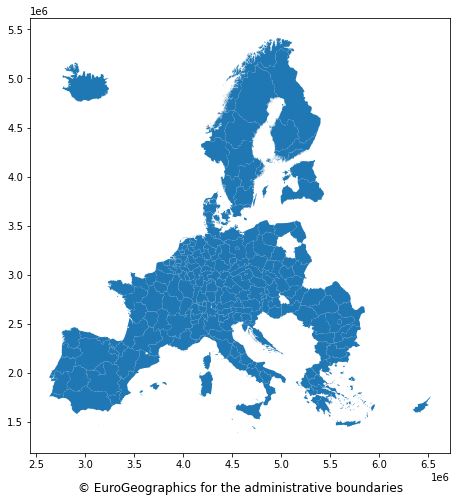

In [24]:
complete_hrst = nuts2_gdf_hrst.dropna()
print(len(complete_hrst))
ax = complete_hrst.plot(figsize=(8,8))
_ = ax.set_xlabel('© EuroGeographics for the administrative boundaries', fontsize = 12, labelpad = 12.0)

Find [**minimum**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html), [**maximum**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html), [**median**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html) and [**mean**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) values for all years and save them in a new DataFrame ```stat_df```. Each function (**min**, **max**, **median**, **mean**) returns values for all columns in the GeoDataFrame, but you need it only for the columns that contain the percentage of people in science and technology sector. Fortunately, these are the only numeric columns of this GeoDataFrame, the rest is of types like string and geometry, therefore you can use filtering parameter ```numeric_only=True``` which will return values only from the numeric columns.

In [25]:
# new DataFrame stat_df is filled with minima at first
stat_df = pandas.DataFrame(complete_hrst.max(numeric_only=True), columns=['max'])

# auxiliary list dfs will contain 3 DataFrames, one for maxima, the second one for means and the third for medians
dfs = []
dfs.append(pandas.DataFrame(complete_hrst.median(numeric_only=True), columns=['median']))
dfs.append(pandas.DataFrame(complete_hrst.mean(numeric_only=True), columns=['mean']))
dfs.append(pandas.DataFrame(complete_hrst.min(numeric_only=True), columns=['min']))

# now the 3 DataFrames are joined to the stat_df in this for loop using merge function
for df in dfs:
    stat_df = stat_df.merge(df, left_index=True, right_index=True)

# print the stat_df
stat_df

,max,median,mean,min
2011,66.8,38.6,37.851073,17.4
2012,62.8,39.5,38.687983,17.9
2013,61.7,40.2,39.355794,16.5
2014,62.4,41.4,40.150644,17.0
2015,62.8,42.3,40.857511,15.1
2016,64.2,43.1,41.564378,15.8
2017,66.2,43.9,42.363090,16.3
2018,66.6,44.6,43.043777,16.9
2019,66.7,45.6,43.748069,15.9
2020,70.5,46.6,44.858369,15.6


For better visualization of the line plot's x axis convert the years (that are index for ```stat_df```) from a string to a datetime type. Use [**pandas.to_datetime()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).

In [26]:
stat_df.index = pandas.to_datetime(stat_df.index)

Finally you can create the line plot showing how the maximum, median, mean and minimum percentages of labour force employed/educated in science and technology evolved from 2011 to 2022. Use the [**DataFrame.plot()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) function and [matplotlib.axes](https://matplotlib.org/stable/api/axes_api.html) documentation to configure the plot.

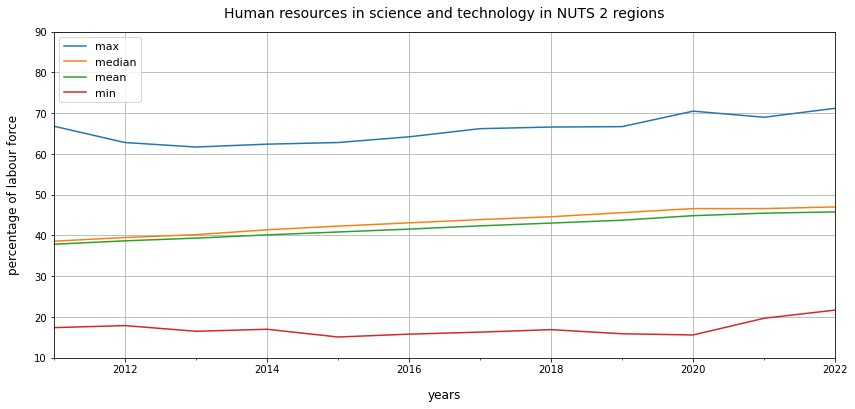

In [27]:
ax = stat_df.plot(figsize=[14,6], use_index=True, grid=True, ylim=[10,90])
ax.legend(loc='upper left', fontsize=11)
ax.set_title('Human resources in science and technology in NUTS 2 regions', fontsize=14, pad=14.0)
ax.set_xlabel('years', fontsize=12, labelpad=14.0)
_ = ax.set_ylabel('percentage of labour force', fontsize=12, labelpad=14.0)

You can see that there is a slow gradual growth in median and mean from below of 40% of labour forces employed/educated in science and technology in 2011 to around 47% and 46%, respectively. Maximum and minimum percentages don't grow that gradually since they are the extreme values and they vary from year to year, but overall these values grown from 2011 to 2022. 

Check the percentages distribution in years 2011 and 2022 by generating histograms ([**DataFrame.hist**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)).

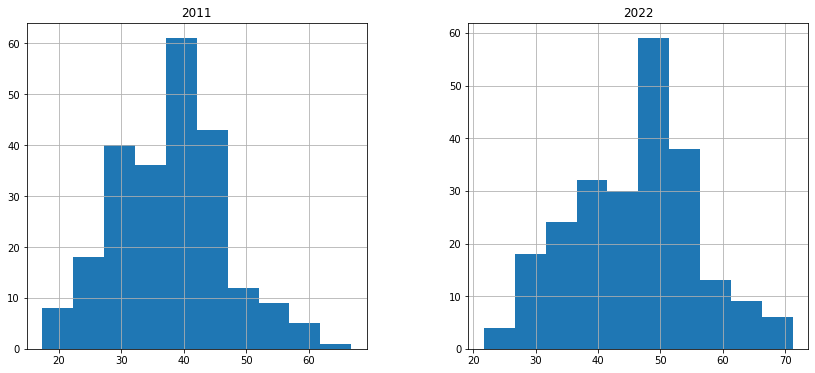

In [30]:
_ = complete_hrst.hist(column=['2011', '2022'], figsize=(14,6), label='percentage of labour force')

The major changes are:
1. a little more than 60 NUTS2 regions have around 40% in 2011 while almost 60 NUTS2 regions have around 50% in 2022, which only confirms the growth of median and mean values.
2. some regions dropped under 20% in 2011 whereas no regions dropped under 20% in 2022.
3. no regions reached the 70% mark in 2011 while 6 regions did reach 70% in 2022.

In [33]:
a = 1217/496*250
a

613.4072580645161

Another way of looking at values distribution, median, maximum, minimum and outliers is a boxplot. Take a look at the picture just to remind yourself what the boxplot is.

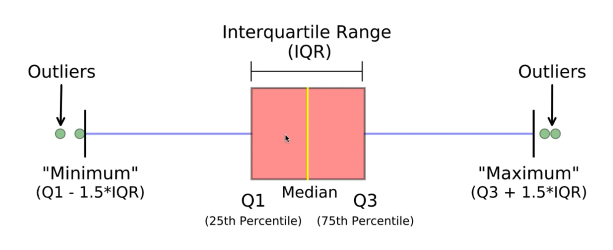

Generate boxplots for all years from the ```complete_hrst``` GeoDataFrame using [**DataFrame.boxplot()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html).

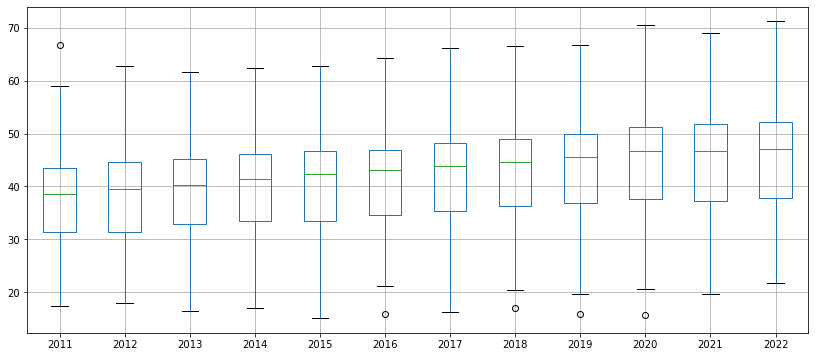

In [31]:
_ = complete_hrst.loc[:, '2011':].boxplot(figsize=(14,6))

The data looks quite symmetric and there are only 5 outliers. Generate now boxplots for all years from the ```nuts2_gdf_hrst``` GeoDataFrame where also regions with null values in some years are included.

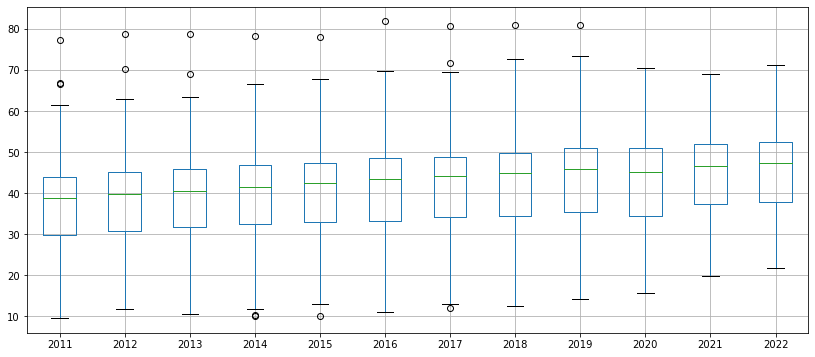

In [34]:
_ = nuts2_gdf_hrst.loc[:, '2011':].boxplot(figsize=(14,6))

You can see that it is a different story now. Quite a lot of outliers especially over the maximum, some of them reaching 80%. Some minimum values, either outliers or standard minima, are as low as 10%.

Let's take a look at which regions are the top and bottom 5 in HRST over the years 2011-2022.

In [ ]:
# the part with selecting top and bottom 5 regions a showing them in a dataframe table and maybe a map and maybe a bar plot

After the interactive leaflet map of Central European regions let's create a static one for all NUTS2 regions. Use the **GeoDataFrame.plot()** function. Parameters ```column```, ```cmap```, ```legend```, ```scheme``` and ```k``` will be the same as for the leaflet map above.

In [ ]:
ax = nuts2_gdf_hrst.plot(column='2022', cmap='YlGnBu', scheme='Quantiles', k=5, 
                         figsize=(16,12), edgecolor='#9e9d9d', linewidth=0.3,
                         legend=True, legend_kwds={'title':'percentage of labour force'},
                         missing_kwds={"color": "lightgrey", "label": "Missing values"},)
ax.set_title('Human resources in science and technology by NUTS2 regions in 2022', fontsize=14, pad=14.0)
ax.text(x=2600000.0, y=1300000.0, s='© EuroGeographics for the administrative boundaries')
ax.set_axis_off()

Create a subset of the ```nuts2_gdf_hrst``` GeoDataFrame by selecting only Central European NUTS2 regions. Central Europe can be defined in a lot of ways, but for this notebook it includes these countries: Germany, Switzerland, Austria, Hungary, Slovakia, Czech Republic and Poland. You can use the same approach as when selecting the biggest cities in Central European countries.

In [41]:
ce_df_list = []
ce_codes = ['SK', 'CZ', 'HU', 'PL', 'AT', 'DE', 'CH']
for country in ce_codes:
    ce_df_list.append(nuts2_gdf_hrst[nuts2_gdf_hrst['CNTR_CODE']==country])

ce_gdf_hrst = pandas.concat(ce_df_list)

Now you'll create a leaflet map of the Central Europeen NUTS2 regions. You can use [**folium**](https://python-visualization.github.io/folium/latest/index.html) package directly by importing it and working with it or you can use this package indirectly via [**GeoDataFrame.explore()**](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.explore.html) function. This function uses **folium** to generate a leaflet map. It has a lot of parameters that enable customizing the map.

Parameter ```tiles``` specifies the basemap. You can choose any basemap from [**xyzservices**](https://xyzservices.readthedocs.io/en/stable/gallery.html). Parameter ```tooltip``` determines which columns will be shown when hovering over the layer. You can choose which color scale will be used in the ```cmap``` parameter. If you want to create a choropleth map with graduated colors, specify how the intervals should be generated in the ```scheme``` parameter. The other parameters are explained in the function documentation. 

In [ ]:
ce_gdf_hrst.explore(column='2022', cmap='YlGnBu', legend=True, scheme='Quantiles', k=5, tiles='CartoDB.Voyager',
                    tooltip=['NAME_LATN', '2022'], popup=['NAME_LATN', 'NUTS_ID', '2020', '2021', '2022'],
                    style_kwds={'stroke':True, 'color':'#9e9d9d', 'width':1, 'fillOpacity':0.8},
                    highlight_kwds={'fillColor':'yellow', 'fillOpacity': 0.4},
                    legend_kwds={'caption':'percentage of labour force employed/educated in science and technology in 2022', 'scale':True},
                    tooltip_kwds={'aliases':['region name', '2022 HRST %']}, 
                    popup_kwds={'aliases':['region name', 'region id', '2020 HRST %', '2021 HRST %', '2022 HRST %']},
                    attr='© EuroGeographics for the administrative boundaries | (C) OpenStreetMap contributors (C) CARTO')

Universities and institutes that educate and employ people in science and technology are located mainly in national capitals and bigger cities. Therefore their percentage of HRST might be higher than other regions in their respective countries. Let's focus on the biggest cities in the Central Europe.

Create a DataFrame named ```capitals``` which will contain data for the biggest cities of Central European countries. For all of them their biggest city is their capital except for Switzerland, where Bern is the capital but Zürich is the biggest city. You can use the same approach as when selecting the NUTS2 regions of Central European countries.

In [38]:
capital_df_list = []
capitals_names = ['Warszawski stołeczny', 'Budapest', 'Praha', 'Berlin', 'Zürich', 'Bratislavský kraj', 'Wien']
for capital in capitals_names:
    capital_df_list.append(nuts2_gdf_hrst[nuts2_gdf_hrst['NUTS_NAME']==capital])

capitals = pandas.concat(capital_df_list)

Keep only the important columns for creating a line plot, which in this case are region's names and the HRST data for years 2014-2022. Warsaw and Budapest miss the data for years 2011 and 2012, that's the reason why those years will be excluded from the plot.

[**DataFrame.T**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html) function transposes the DataFrame, so the columns become index and vice-versa. Then you need to specify that the columns should be the NUTS2 name using [**DataFrame.columns**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html). In the end [**drop()**](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) the extra row with NUTS2 names and print the ```capitals```.

In [39]:
capitals = capitals.loc[:, ('NUTS_NAME','2014','2015','2016','2017','2018','2019','2020','2021','2022')]
capitals = capitals.T
capitals.columns = capitals.loc['NUTS_NAME', :]
capitals.drop(index='NUTS_NAME', inplace=True)
capitals

NUTS_NAME,Warszawski stołeczny,Budapest,Praha,Berlin,Zürich,Bratislavský kraj,Wien
2014,64.7,56.6,57.3,53.8,56.9,56.4,56.6
2015,65.9,56.7,55.8,54.0,58.2,54.2,56.1
2016,66.8,55.4,58.5,57.3,60.2,54.0,55.9
2017,69.4,55.8,60.2,58.5,61.5,58.1,56.9
2018,70.7,58.9,60.4,60.4,62.8,57.4,55.5
2019,68.6,60.3,61.4,61.6,64.9,60.4,56.6
2020,69.1,62.6,63.3,61.5,65.5,60.5,57.2
2021,68.7,67.4,67.8,65.2,65.3,63.5,57.9
2022,68.8,68.1,67.8,66.5,65.4,62.7,60.1


Create the line plot and check how the HRST percentages in the Central European capitals and the biggest Swiss city progress throughout the years 2014-2022. 

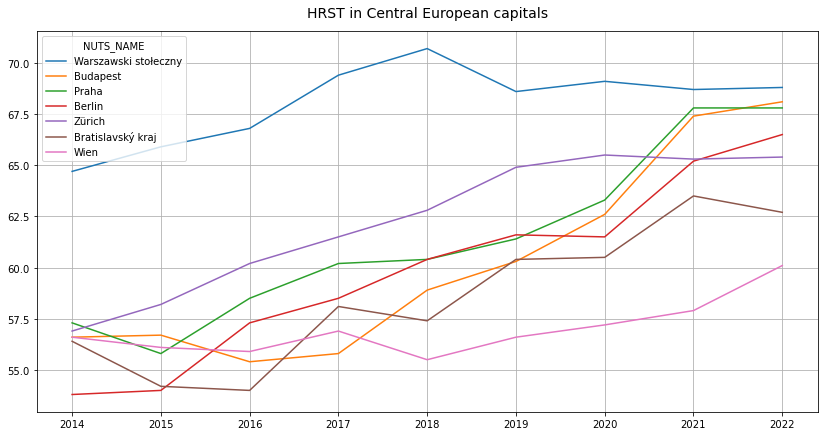

In [40]:
ax = capitals.plot(figsize=(14,7), grid=True)
_ = ax.set_title('HRST in Central European capitals', fontsize=14, pad=14.0)